# Introduction 

We analyze data from a two-alternative forced choice task (e.g. the random-dot-task). In these tasks ambiguous evidence for two alternative choices is presented to an observer. The ambiguity results in imperfect performance, that varies with the strength of the ambiguity. This relationship is quantified by the "psychometric function".

## Prerequisites

- two-alternative forced choice task
- the psychometric function relates an observer's performance to the observed stimulus
- basic Python skills


## Objectives

- perform elementary data analysis steps on real data
- calculate a psychometric function from data

## Notes

All problems can be solved with either numpy or pandas

# Notebook setup 

In [1]:
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1: Monkey dot data

## Load data

** Instruction **

Load the data. Note:

- Read the data from file 'dots_psychophysics.txt'
- Each line is one trial, the columnns encode
    - coherence of random dot pattern
    - direction of random dot pattern
    - the direction the monkey chose
    - if the monkey was rewarded
    - the monkey's reaction time
- direction / choice is encoded as: 1 = 0% coherence, 2 = left, 3 = right
- on 0% coherence trials the monkey was rewarded randomly

In [2]:
import pandas as pd
data = pd.read_csv("data/dots_psychophysics.txt", header = None, delimiter = "  ")
data = data.as_matrix()

/opt/conda/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


*** NOTE: ***

- direction == 1 encodes 0% coherence stimuli
- direction == 2 encodes 'left' stimuli
- direction == 3 encodes 'right' stimuli

## Consistency check 

**Instruction**

- check that whenever coherence is 0, direction also encodes the 0% stimulus

In [3]:
np.all(data[:, 1][data[:, 0] == 0])

True

**Instruction**

- what's the distribution of choices when coherence == 0?

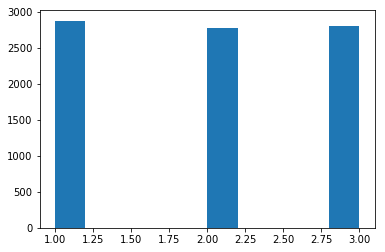

In [4]:
plt.hist(data[:, 2][data[:, 0] == 0])
plt.show()

**Instruction**

- For non-zero-coherence trials, is it true that whenever direction == choice then rewarded == True?

False


/opt/conda/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 49463 but corresponding boolean dimension is 33073
  after removing the cwd from sys.path.
/opt/conda/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 49463 but corresponding boolean dimension is 33073
  """


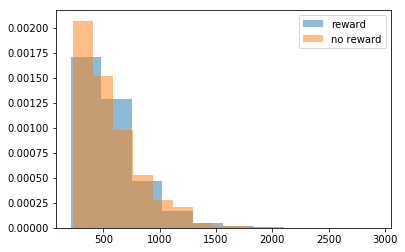

In [5]:
condition = (data[:, 0] != 0) & (data[:, 1] == data[:, 2])
reward = data[condition, 3]
print np.all(reward)
plt.hist(data[reward == True, 4], label = "reward", normed = True, alpha = 0.5)
plt.hist(data[reward == False, 4], label= "no reward", normed = True, alpha = 0.5)
plt.legend()
plt.show()

* Does this make sense?
* Compare the reaction times for non-rewarded trials, in which the monkey chose the stimulus direction to those of other trials

## How much data do we have, broken down by direction?

** Instruction **

Make a bar plot of the number of trials, broken down by stimulus direction and coherence. Don't forget axes labels and a plot title.

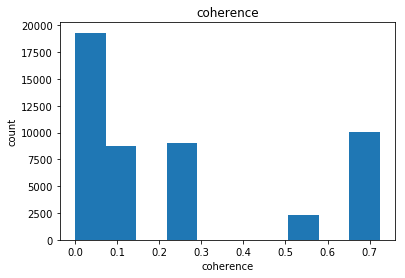

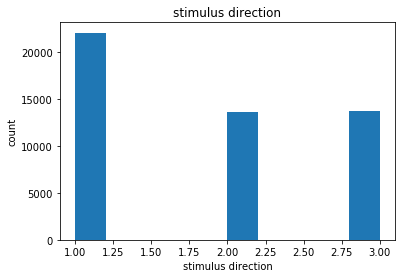

In [6]:
plt.hist(data[:, 0])
plt.xlabel("coherence")
plt.ylabel("count")
plt.title("coherence")

plt.figure()
plt.hist(data[:, 1])
plt.xlabel("stimulus direction")
plt.ylabel("count")
plt.title("stimulus direction")

## Psychometric function

** Instruction **

Plot the psychometric function, i.e. fraction of correct choices vs. coherence

- once collapsing all directions
- once keeping directions (i.e. plot fraction of right choices for all coherence levels, where for left choices coherence is set to negative values)

### Aborted trials

Filter out aborted trials, i.e. trials in which the monkey chose the stimulus direction but wasn't rewarded

In [7]:
select = (data[:, 1] == data[:, 2]) & (data[:, 3] == False)
data = data[~select, :]

### Use all directions

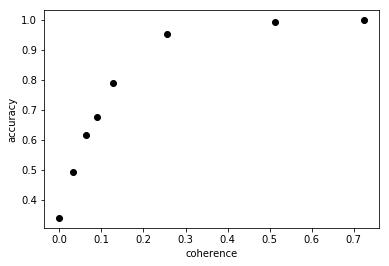

In [8]:
coh = np.unique(data[:, 0])
acc = np.zeros_like(coh)
for (i, c) in enumerate(coh):
    select = data[:, 0] == c
    acc[i] = sum((data[:, 1] == data[:, 2]) & select) / float(sum(select))
    
plt.plot(coh, acc, "ko")
plt.xlabel("coherence")
plt.ylabel("accuracy")

### Use only direction == 'left' and direction == 'right' trials

/opt/conda/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys
/opt/conda/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


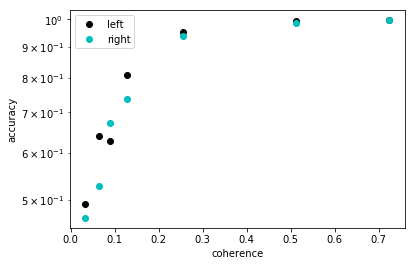

In [11]:
coh = np.unique(data[:, 0])
acc_left = np.zeros_like(coh)
acc_right = np.zeros_like(coh)

for (i, c) in enumerate(coh):
    select = (data[:, 0] == c) & (data[:, 1] == 2)
    acc_left[i] = sum((data[:, 1] == data[:, 2]) & select) / float(sum(select))
    select = (data[:, 0] == c) & (data[:, 1] == 3)
    acc_right[i] = sum((data[:, 1] == data[:, 2]) & select) / float(sum(select))

plt.plot(coh, acc_left, "ko", label = "left")
plt.plot(coh, acc_right, "co", label = "right")
plt.yscale("log")
plt.xlabel("coherence")
plt.ylabel("accuracy")
plt.legend()

/opt/conda/envs/py2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


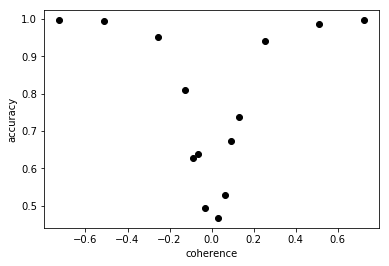

In [10]:
coh_all = [-coh, coh]
acc_all = [acc_left, acc_right]
plt.plot(coh_all, acc_all, "ko")
plt.xlabel("coherence")
plt.ylabel("accuracy")
plt.legend()

# [Small project] Rat odor data

## Load data

** Instructions **

- load the file "data/odor_psychophysics.csv'
- the columns represent: 'rat', 'session', 'direction', 'contrast', 'choice', 'rewarded'
- analyze the data
- in particular
    - plot the psychometric curve for each rat
    - plot the mean psychometric curve for all rats including error bars

In [13]:
data = pd.read_csv("data/odor_psychophysics.csv")

In [14]:
data

,1,15342,2,0.9,2.1,1.1
0,1,15342,3,0.90,3,1
1,1,15342,3,0.90,3,1
2,1,15342,3,0.90,3,1
3,1,15342,2,0.60,3,0
4,1,15342,2,0.60,2,1
5,1,15342,2,0.36,2,1
6,1,15342,3,0.90,3,1
7,1,15342,3,0.36,3,1
8,1,15342,2,0.90,3,0
9,1,15342,2,0.90,2,1


In [17]:
data.values

array([[  1.00000000e+00,   1.53420000e+04,   3.00000000e+00,
          9.00000000e-01,   3.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.53420000e+04,   3.00000000e+00,
          9.00000000e-01,   3.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.53420000e+04,   3.00000000e+00,
          9.00000000e-01,   3.00000000e+00,   1.00000000e+00],
       ..., 
       [  8.00000000e+00,   1.52470000e+04,   3.00000000e+00,
          3.60000000e-01,   2.00000000e+00,   0.00000000e+00],
       [  8.00000000e+00,   1.52470000e+04,   2.00000000e+00,
          6.00000000e-01,   2.00000000e+00,   1.00000000e+00],
       [  8.00000000e+00,   1.52470000e+04,   2.00000000e+00,
          9.00000000e-01,   2.00000000e+00,   0.00000000e+00]])